Parametric correlation coefficient exercises

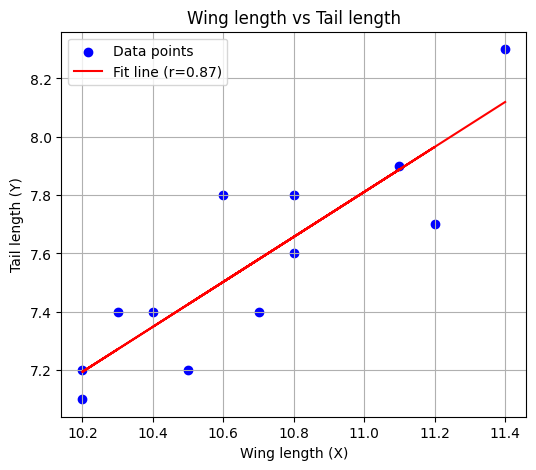

r_XY = 0.8703545613058227
r_YX = 0.8703545613058227
Standard error of Rxy using Fisher's z = 0.3333333333333333
95% CI for r = [0.5923032846726551, 0.9631607285142775]
p-value H0: rho=0 = 0.00023110594312059085
Reject H0: rho=0, value of Rxy is significant.
p-value H0: rho=0.75 = 0.27803030186088296
Do not reject H0: rho=0.75, value of Rxy is not significantly different than 0.75.
Statistical power and sample size calculations:
Power at n=12 for r=0.5 = 0.377657305828263
Required n for 80% power (r=0.5) = 30


In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from math import atanh, tanh, sqrt

# Data
X = np.array([10.4,10.8,11.1,10.2,10.3,10.2,10.7,10.5,10.8,11.2,10.6,11.4])
Y = np.array([7.4,7.6,7.9,7.2,7.4,7.1,7.4,7.2,7.8,7.7,7.8,8.3])
n = len(X)


# Fit regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
line = slope*X + intercept

# Scatterplot + regression line
plt.figure(figsize=(6,5))
plt.scatter(X, Y, color="blue", label="Data points")
plt.plot(X, line, color="red", label=f"Fit line (r={r_value:.2f})")
plt.xlabel("Wing length (X)")
plt.ylabel("Tail length (Y)")
plt.title("Wing length vs Tail length")
plt.legend()
plt.grid(True)
plt.show()
# X and Y do seem to be related (positively correlated)


# 1) Correlation and regression
r = np.corrcoef(X, Y)[0,1]
slope, intercept, _, _, _ = stats.linregress(X, Y)

# 2) r_XY and r_YX
r_xy = r
r_yx = np.corrcoef(Y, X)[0,1]

# 3) Fisher z CI
z = atanh(r)
se_z = 1/np.sqrt(n-3)
z_ci = [z - 1.96*se_z, z + 1.96*se_z]
r_ci = [tanh(z_ci[0]), tanh(z_ci[1])]

# 4) Test H0: rho=0
t_stat = r*np.sqrt((n-2)/(1-r**2))
p_val = 2*(1 - stats.t.cdf(abs(t_stat), df=n-2))

# 5) Test H0: rho=0.75
r0 = 0.75
z0 = atanh(r0)
z_stat = (z - z0)/se_z
p_val_r0 = 2*(1 - stats.norm.cdf(abs(z_stat)))

# 6) Power for r=0.5 and n needed for 80% power
alpha = 0.05
r_true = 0.5
z_true = atanh(r_true)
z_alpha = stats.norm.ppf(1 - alpha/2)

def power(n):
    se = 1/np.sqrt(n-3)
    mean = z_true/se
    return (1 - stats.norm.cdf(z_alpha - mean)) + stats.norm.cdf(-z_alpha - mean)

power_current = power(n)
n_req = next(k for k in range(4,200) if power(k) >= 0.8)

print("r_XY =", r_xy)
print("r_YX =", r_yx)

print("Standard error of Rxy using Fisher's z =", se_z)
print("95% CI for r =", r_ci)


print("p-value H0: rho=0 =", p_val)
if p_val < 0.05:
    print("Reject H0: rho=0, value of Rxy is significant.")
else:
    print("Do not reject H0: rho=0")
print("p-value H0: rho=0.75 =", p_val_r0)
if p_val_r0 < 0.05:
    print("Reject H0: rho=0.75, value of Rxy is significantly different than 0.75.")
else:   
    print("Do not reject H0: rho=0.75, value of Rxy is not significantly different than 0.75.")


print("Statistical power and sample size calculations:")
print("Power at n=12 for r=0.5 =", power_current)
print("Required n for 80% power (r=0.5) =", n_req)
